
## Task

Your task is to use the [Heart Disease UCI](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data) dataset from Kaggle to predict whether or not a patient has heart disease based on various medical attributes.

## Data Preparation:
- Download the “Heart Disease UCI” dataset from Kaggle.
- Perform exploratory data analysis (EDA) to understand the dataset.
- Preprocess the data: handle missing values if any, encode categorical variables, and scale the features.

## Model Training:
- Split the dataset into a training set and a testing set.

- Train a logistic regression model on the training set.

## Model Evaluation:
- Evaluate the model on the testing set using accuracy, precision, recall, and F1 score.
- Use a confusion matrix to visualize the model’s performance.


---

## About Dataset
Context

This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.
Content
Column Descriptions:

1. id (Unique id for each patient)
2. age (Age of the patient in years)
3. origin (place of study)
4. sex (Male/Female)
5. cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
6. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
7. chol (serum cholesterol in mg/dl)
8. fbs (if fasting blood sugar > 120 mg/dl)
9. restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
10. thalach: maximum heart rate achieved
11. exang: exercise-induced angina (True/ False)
12. oldpeak: ST depression induced by exercise relative to rest
13. slope: the slope of the peak exercise ST segment
14. ca: number of major vessels (0-3) colored by fluoroscopy
15. thal: [normal; fixed defect; reversible defect]
16. num: the predicted attribute

Acknowledgements
Creators:

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Relevant Papers:

* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a * new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310. Web Link
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." Web Link
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. Web Link

Citation Request:

The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.
---

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# remove warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('heart_disease_uci.csv')

# Exploratory Data Analysis (EDA)

In [3]:
# Display the first few rows of the dataframe
display(df.head())

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
# this data contains 920 rows and 16 columns 
df.shape

(920, 16)

### Dealing With Age Column

In [5]:
# age min and max
df['age'].min(), df['age'].max()

(np.int64(28), np.int64(77))

In [6]:
# age distribution
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

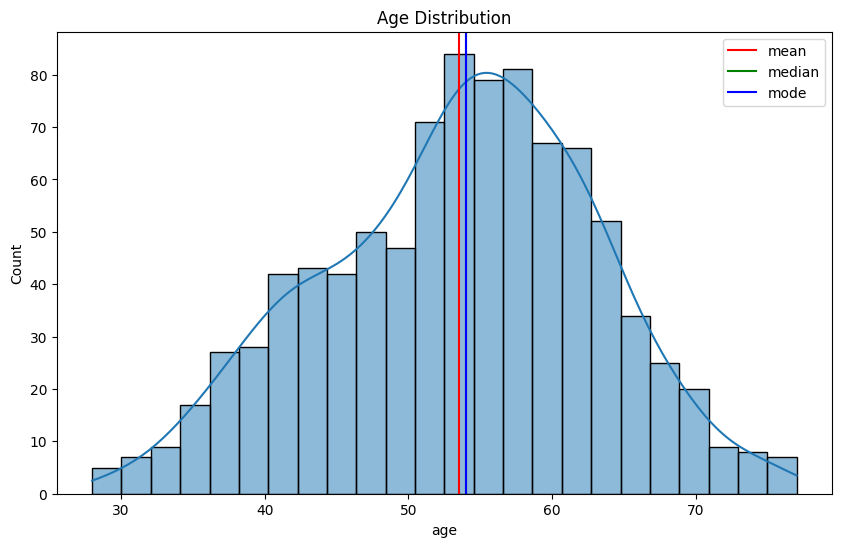

(np.float64(53.51086956521739), np.float64(54.0), np.int64(54))

In [7]:
# calculate optimal number of bins for age column
age_range = df['age'].max() - df['age'].min()
num_bins = int(age_range / 2)
# num_bins = int(float(df['age'].value_counts().sum()) ** .5)

# plot the mean, median, and mode of the age column
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=num_bins, kde=True)
plt.axvline(df['age'].mean(), color='red', label='mean')
plt.axvline(df['age'].median(), color='green', label='median')
plt.axvline(df['age'].mode()[0], color='blue', label='mode')
plt.legend()
plt.title('Age Distribution')
plt.show()

# print the mean, median, and mode of the age column
df['age'].mean(), df['age'].median(), df['age'].mode()[0]

### Dealing with Trestbps Column

In [8]:
# find the value counts of trestbps column
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [9]:
df['trestbps'].min()

np.float64(0.0)

It is impossible to have a Blood Pressure at 0 so we are going to remove columns containing Value 0 and replacing it with Null values later on we will deal with missing values

In [10]:
df = df[df['trestbps'] != 0]

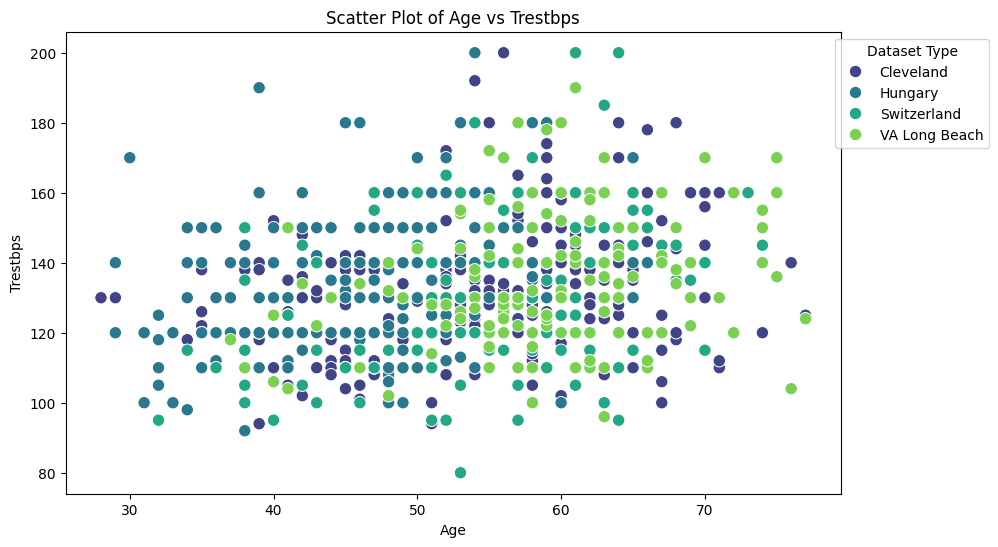

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='trestbps', hue='dataset', palette='viridis', s=80)

plt.title('Scatter Plot of Age vs Trestbps')
plt.xlabel('Age')
plt.ylabel('Trestbps')
plt.legend(title='Dataset Type', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()

<Axes: xlabel='trestbps', ylabel='Count'>

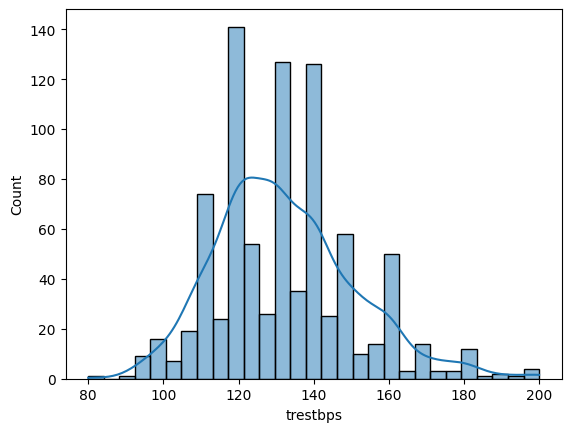

In [12]:
# create a histplot of trestbps column
sns.histplot(df['trestbps'], kde=True)

The range of Blood Pressure is now from 80 to 200 which is possible

### Exploring chol, thalch, oldpeak

In [13]:
# Define the columns you want to explore
# columns_to_explore = ['chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
columns_to_explore = ['chol', 'thalch','oldpeak']

# Display datatype, value counts, and other insights for each column
for column in columns_to_explore:
    print(f"Column: {column}")
    print(f"Datatype: {df[column].dtype}")
    print(f"Value Counts:\n{df[column].value_counts()}\n")
    print(f"Number of unique values: {df[column].nunique()}")
    if df[column].dtype == 'object':
        print(f"Top value: {df[column].mode()[0]}")
    else:
        print(f"Mean: {df[column].mean()}")
        print(f"Min: {df[column].min()}")
        print(f"Max: {df[column].max()}")
    print("-" * 50)

# Additional insights (mean, min, max, etc.) for numerical columns
# numerical_columns = ['chol', 'trestbps', 'thalch', 'oldpeak', 'ca']
numerical_columns = ['chol', 'trestbps', 'thalch', 'oldpeak']

print("Additional insights for numerical columns:")
print(df[numerical_columns].describe())

# Additional insights for categorical columns
# categorical_columns = ['fbs', 'restecg', 'exang', 'slope', 'thal']
categorical_columns = ['thal']

print("\nAdditional insights for categorical columns:")
for column in categorical_columns:
    print(f"Column: {column}")
    print(f"Unique values: {df[column].unique()}")
    print("-" * 50)

Column: chol
Datatype: float64
Value Counts:
chol
0.0      171
220.0     10
254.0     10
204.0      9
219.0      9
        ... 
165.0      1
337.0      1
333.0      1
139.0      1
385.0      1
Name: count, Length: 217, dtype: int64

Number of unique values: 217
Mean: 199.35433070866142
Min: 0.0
Max: 603.0
--------------------------------------------------
Column: thalch
Datatype: float64
Value Counts:
thalch
150.0    43
140.0    41
120.0    35
130.0    30
160.0    26
         ..
63.0      1
67.0      1
107.0     1
69.0      1
73.0      1
Name: count, Length: 119, dtype: int64

Number of unique values: 119
Mean: 137.52546296296296
Min: 60.0
Max: 202.0
--------------------------------------------------
Column: oldpeak
Datatype: float64
Value Counts:
oldpeak
 0.0    370
 1.0     83
 2.0     76
 1.5     47
 3.0     28
 0.5     19
 1.2     17
 2.5     16
 0.8     15
 1.4     15
 0.6     14
 0.2     14
 1.6     14
 1.8     12
 0.4     10
 0.1      9
 4.0      8
 2.6      7
 2.8      7
 2.2  



Observations

- If the ca value is 0, it means there are no significant problems in the major blood vessels. It's like saying everything looks good in terms of how blood is flowing through the big arteries in the heart.

- The thalch variable typically represents the maximum heart rate achieved during exercise. If it's 60, it is the lowest number, indicating correct information.

- Cholesterol is an essential component of cell membranes and a precursor for certain hormones, so having a cholesterol level of exactly 0 is not consistent with normal physiological functioning. It's very rare and almost impossible.

- Need to impute Cholesterol.
- According to my observation, there is no need to remove zeros in ca Column because it makes sense to the data.



### Dealing with Missing Values



We are going to make a function to deal with missing values.


In [14]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']



This function imputes missing values in Categorical columns

    Step 1: Separate rows with missing and non-missing values for the target column
    Step 2: Extract features (X) and target variable (y) for non-missing values
    Step 3: Extract other missing columns for later imputation
    Step 4: Encode categorical columns using LabelEncoder
    Step 5: Encode the target column if it is a boolean type
    Step 6: Initialize IterativeImputer with RandomForestRegressor as the estimator
    Step 7: Impute other missing columns in the dataset
    Step 8: Split the data into training and testing sets
    Step 9: Train a RandomForestClassifier to predict missing values in the target column
    Step 10: Predict missing values and calculate accuracy
    Step 11: Prepare the dataset with missing values for the final imputation
    Step 12: Impute missing values in the target column for the original missing data
    Step 13: Predict missing values in the target column
    Step 14: Combine the imputed data with the original dataset

This function imputes missing values in continuous columns

    Step 1: Separate rows with missing and non-missing values for the target column
    Step 2: Extract features (X) and target variable (y) for non-missing values
    Step 3: Extract other missing columns for later imputation
    Step 4: Encode categorical columns using LabelEncoder
    Step 5:Initialize IterativeImputer with RandomForestRegressor as the estimator
    Step 6: Impute other missing columns in the dataset
    Step 7: Split the data into training and testing sets
    Step 8: Train a RandomForestRegressor to predict missing values in the target column
    Step 9: Predict missing values and calculate performance metrics



In [15]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [16]:
# This function imputes missing values in categorical columnsdef impute_categorical_missing_data(passed_col):
    
def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [17]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

ca          610
thal        485
slope       309
fbs          90
oldpeak      62
trestbps     59
exang        55
thalch       55
chol         30
restecg       2
dtype: int64

In [18]:
# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.42%
MAE = 13.007906976744184 

RMSE = 16.817274721837883 

R2 = 0.12122854447821807 

Missing Values chol : 3.26%
MAE = 43.93235955056179 

RMSE = 59.5680668260542 

R2 = 0.694715712631568 

Missing Values fbs : 9.79%
The feature 'fbs' has been imputed with 80.12 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 65.22 accuracy

Missing Values thalch : 5.98%
MAE = 16.608150289017342 

RMSE = 21.822103751442672 

R2 = 0.35243237470580224 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 76.3 accuracy

Missing Values oldpeak : 6.75%
MAE = 0.5325813953488372 

RMSE = 0.7718384651460886 

R2 = 0.4284118158797372 

Missing Values slope : 33.62%
The feature 'slope' has been imputed with 68.85 accuracy

Missing Values ca : 66.38%
The feature 'ca' has been imputed with 67.74 accuracy

Missing Values thal : 52.77%
The feature 'thal' has been imputed with 70.11 accuracy



In [19]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

### Dealing with Outliers

In [20]:
import plotly.express as px

# create box plots for all numeric columns using for loop and subplot
numeric_columns = df.select_dtypes(include=['number']).columns

# Create box plots for all numeric columns using a for loop
for column in numeric_columns:
    fig = px.box(df, y=column, title=f'Box Plot for {column}')
    fig.show()

We have seen some outliers so i am going to use z score method with a threshold 2.8 because at this threshhold test_accuracy and cross validation scores improve

In [21]:
import pandas as pd
from scipy import stats
import numpy as np

# Sample DataFrame
# Assume your DataFrame is named 'df'
# df = ...

# Define the columns to check for outliers
columns_to_check = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

# Calculate Z-scores for the specified columns
z_scores = np.abs(stats.zscore(df[columns_to_check]))

# Define a Z-score threshold for outlier detection (you can adjust this threshold)
z_score_threshold = 2.8

# Identify outliers using the threshold
outliers = (z_scores > z_score_threshold).any(axis=1)

# Display the rows containing outliers
print("Rows with outliers:")
print(df[outliers])

# Remove outliers
df = df[~outliers]

# Display the DataFrame without outliers
print("\nDataFrame without outliers:")
print(df.head(5))

Rows with outliers:
      id  age     sex        dataset               cp  trestbps   chol    fbs  \
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
40    41   65  Female      Cleveland     asymptomatic     150.0  225.0  False   
62    63   58    Male      Cleveland     asymptomatic     128.0  216.0  False   
91    92   62  Female      Cleveland     asymptomatic     160.0  164.0  False   
92    93   62    Male      Cleveland      non-anginal     130.0  231.0  False   
104  105   49    Male      Cleveland      non-anginal     120.0  188.0  False   
118  119   63    Male      Cleveland     asymptomatic     130.0  330.0   True   
121  122   63  Female      Cleveland     asymptomatic     150.0  407.0  False   
123  124   55    Male      Cleveland     asymptomatic     140.0  217.0  False   
126  127   56  Female      Cleveland     asymptomatic     200.0  288.0   True   
146  147   57    Male      Cleveland     asymptomatic     165.0  289.0   True   
152  153

In [22]:


# creating box plots to visulize the columns havon no outliers
fig = px.box(data_frame=df, y='age')
fig.show()

fig = px.box(data_frame=df, y='trestbps')
fig.show()

fig = px.box(data_frame=df, y='chol')
fig.show()

fig = px.box(data_frame=df, y='thalch')
fig.show()

fig = px.box(data_frame=df, y='oldpeak')
fig.show()
fig = px.box(data_frame=df, y='ca')
fig.show()



In [23]:
import pandas as pd
import plotly.express as px

# Assuming 'df' is your DataFrame

# Scatter plot for thalch and oldpeak
fig1 = px.scatter(df, x='thalch', y='oldpeak', title='Scatter Plot: thalch vs oldpeak')

# Box plot for restecg and thalch
fig2 = px.box(df, x='restecg', y='thalch', title='Box Plot: thalch vs restecg')

# Violin plot for slope and thalch
fig3 = px.violin(df, x='slope', y='thalch', title='Violin Plot: thalch vs slope')

# Histogram for ca
fig4 = px.histogram(df, x='ca', title='Histogram: ca')

# Bar plot for fbs
fig5 = px.bar(df, x='fbs', title='Bar Plot: fbs')

# Pie chart for exang
fig6 = px.pie(df, names='exang', title='Pie Chart: exang')

# Display the plots
fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()
fig6.show()

## Data Preprocessing
Assuming the dataset is clean and requires no further preprocessing steps like handling missing values or encoding categorical variables

In [24]:
# Feature scaling
scaler = StandardScaler()
features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
df[features] = scaler.fit_transform(df[features])

In [25]:
# Splitting the dataset into the Training set and Test set
X = df[features]
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

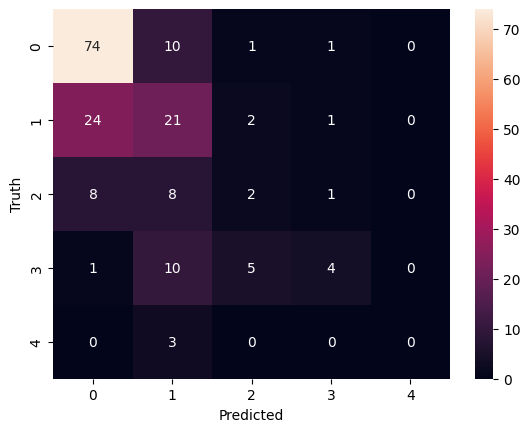

In [27]:
# Making Predictions
y_pred = model.predict(X_test)

# Model Evaluation
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [28]:

# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.86      0.77        86
           1       0.40      0.44      0.42        48
           2       0.20      0.11      0.14        19
           3       0.57      0.20      0.30        20
           4       0.00      0.00      0.00         3

    accuracy                           0.57       176
   macro avg       0.37      0.32      0.32       176
weighted avg       0.53      0.57      0.54       176



In [29]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 57.39%
